In [1]:
import cv2
import imutils
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def display_results(img, count, original_image, cmap="gray"):
    f, axs = plt.subplots(1, 2, figsize=(12, 5))
    
    axs[0].imshow(cv2.imread("PXL_20210520_143606274.jpg"), cmap="gray")
    axs[1].imshow(img, cmap="gray")
    
    axs[1].set_title("Total Coins Count = {}".format(count))

In [3]:
original_image = cv2.imread("PXL_20210520_143606274.jpg")

In [4]:
alpha = 1.5
beta = 0
image = cv2.convertScaleAbs(original_image, alpha=alpha, beta=beta)

image_blur = cv2.medianBlur(image, 25)
image_blur_gray = cv2.cvtColor(image_blur, cv2.COLOR_BGR2GRAY)

image_res, image_thresh = cv2.threshold(image_blur_gray, 240, 255, cv2.THRESH_BINARY_INV)
kernel = np.ones((3, 3), np.uint8)

opening = cv2.morphologyEx(image_thresh, cv2.MORPH_OPEN, kernel) 

dist_transform = cv2.distanceTransform(opening,cv2.DIST_L2,5)
ret, last_image = cv2.threshold(dist_transform, 0.4 * dist_transform.max(), 255, 0)
last_image = np.uint8(last_image)

cnts = cv2.findContours(last_image.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
cnts = imutils.grab_contours(cnts)

In [5]:
for (i, c) in enumerate(cnts):
    ((x, y), _) = cv2.minEnclosingCircle(c)
    text_location = (int(x) - 100, int(y) + 60)
    red = (255, 0, 0)
    cv2.putText(image, " {} ".format(i + 1), text_location, cv2.FONT_HERSHEY_SIMPLEX, 5, red, 10)
    cv2.drawContours(image, [c], -1, (0, 255, 0), 2)


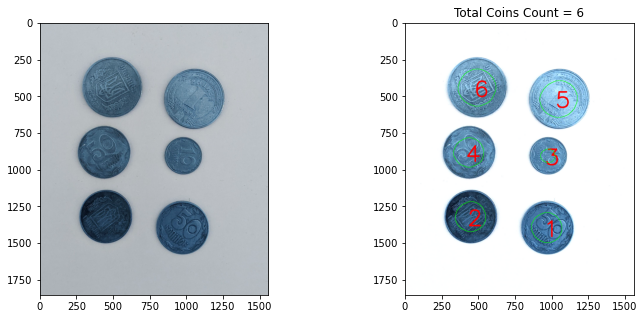

In [6]:
display_results(image, len(cnts), original_image)